In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction import FeatureHasher
import category_encoders as ce

In [2]:
price=pd.read_csv("train.csv")
price.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
price.drop_duplicates(inplace=True)

In [4]:
#Q1,Q3=np.percentile(price['Price'],[25,75])
#IQR=Q3-Q1
#lower_range= Q1-(1.5 * IQR)
#print(lower_range)
#upper_range= Q3+(1.5 * IQR)
#print(upper_range)
#print(Q1)
#print(Q3)

In [5]:
#Q=np.percentile(price['Price'],90)
#Q

In [6]:
#price[price['Price']>upper_range]

In [7]:
#price[price['Price']<100]

In [8]:
#price.drop(price[price['Price']<100].index,axis=0,inplace=True)

In [9]:
#price.loc[price['Price']<100,'Price']=np.NaN

In [10]:
#price["Price"].isnull().sum()

In [11]:
#price['Price'].fillna(price['Price'].mean(),inplace=True)

In [12]:
price.shape

(18924, 18)

In [13]:
price['Mileage']=price['Mileage'].str.strip('km')

In [14]:
price['Mileage']=price['Mileage'].astype('int64')

In [15]:
price.loc[:,'Mileage']=price.loc[:,'Mileage'].replace(0, np.NaN)

In [16]:
price.loc[:,'Mileage']=price.loc[:,'Mileage'].replace(999999999, np.NaN)

In [17]:
price.loc[:,'Levy']=price.loc[:,'Levy'].replace('-', np.NaN)

In [18]:
price['Levy']=price['Levy'].astype('float64')

In [19]:
price.drop('ID',axis=1,inplace=True)

In [20]:
#price.loc[price['Engine volume'].str.contains("Turbo"),'kind']='Turbo'

In [21]:
#price['kind'].fillna('NonTurbo',inplace=True)

In [22]:
#price['kind'].value_counts()

In [23]:
price['Engine volume']=price['Engine volume'].str.strip('Turbo')

In [24]:
price['Engine volume']=price['Engine volume'].astype('float64')

In [25]:
#fig_dims = (10, 10) 
#fig, axs = plt.subplots(nrows=1, ncols=1,figsize=fig_dims)
#sns.boxplot(price['Price'])

In [26]:
#for i in col:
#    fig_dims = (10, 5) 
#    fig, axs = plt.subplots(nrows=1, ncols=2,figsize=fig_dims) 
#    #sns.distplot(price[i], kde=True, ax=axs[0]) 
#    sns.boxplot(x= i, data=price, ax=axs[1],orient="v") 

In [27]:
Do={'Doors':{'04-May':'A','02-Mar':'B','>5':'C'}}

In [28]:
price.replace(Do,inplace=True)

In [29]:
price.drop('Model',axis=1,inplace=True)

In [30]:
#price.drop('Manufacturer',axis=1,inplace=True)

In [31]:
encoder=ce.HashingEncoder(cols='Manufacturer',n_components=10)

In [32]:
price=encoder.fit_transform(price,inplace=True)

In [33]:
price.rename(columns={'col_0':'Man0','col_1':'Man1','col_2':'Man2','col_3':'Man3','col_4':'Man4','col_5':'Man5','col_6':'Man6','col_7':'Man7','col_8':'Man8','col_9':'Man9'},inplace=True)

In [34]:
#encoder1=ce.HashingEncoder(cols='Model',n_components=12)

In [35]:
#price=encoder1.fit_transform(price,inplace=True)

In [36]:
#price.rename(columns={'col_0':'Mod0','col_1':'Mod1','col_2':'Mod2','col_3':'Mod3','col_4':'Mod4','col_5':'Mod5','col_6':'Mod6','col_7':'Mod7','col_8':'Mod8','col_9':'Mod9','col_10':'Mod10','col_11':'Mod11'},inplace=True)

In [37]:
price_dummy = pd.get_dummies(price,drop_first=True)
price_dummy.head()

,Man0,Man1,Man2,Man3,Man4,Man5,Man6,Man7,Man8,Man9,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
Train,Test = train_test_split(price_dummy,test_size=0.3,random_state=1)

In [39]:
#col= ['Price','Prod. year','Engine volume','Cylinders','Airbags']
#col

In [40]:
#def remove_outlier(col):
#    sorted(col)
#    Q1,Q3=np.percentile(col,[25,75])
#    IQR=Q3-Q1
#    lower_range= Q1-(1.5 * IQR)
#    upper_range= Q3+(1.5 * IQR)
#    return lower_range, upper_range

In [41]:
#lr,ur=remove_outlier(Train['Price'])
#print(lr)
#print(ur)

In [42]:
#lr,ur=remove_outlier(Train['Prod. year'])
#print(lr)
#print(ur)

In [43]:
#lr,ur=remove_outlier(Train['Engine volume'])
#print(lr)
#print(ur)

In [44]:
#lr,ur=remove_outlier(Train['Cylinders'])
#print(lr)
#print(ur)

In [45]:
#lr,ur=remove_outlier(Train['Airbags'])
#print(lr)
#print(ur)

In [46]:
#lr,ur=remove_outlier(Train['Price'])
#Train['Price']=np.where(Train['Price']>ur,ur,Train['Price'])
#Train['Price']=np.where(Train['Price']<lr,lr,Train['Price'])

In [47]:
#Test['Price']=np.where(Test['Price']>46886.0,46886.0,Test['Price'])
#Test['Price']=np.where(Test['Price']<-19602.0,-19602.0,Test['Price'])

In [48]:
#lr,ur=remove_outlier(Train['Prod. year'])
#Train['Prod. year']=np.where(Train['Prod. year']>ur,ur,Train['Prod. year'])
#Train['Prod. year']=np.where(Train['Prod. year']<lr,lr,Train['Prod. year'])

In [49]:
#Test['Prod. year']=np.where(Test['Prod. year']>2024.0,2024.0,Test['Prod. year'])
#Test['Prod. year']=np.where(Test['Prod. year']<2000.0,2000.0,Test['Prod. year'])

In [50]:
#lr,ur=remove_outlier(Train['Engine volume'])
#Train['Engine volume']=np.where(Train['Engine volume']>ur,ur,Train['Engine volume'])
#Train['Engine volume']=np.where(Train['Engine volume']<lr,lr,Train['Engine volume'])

In [51]:
#Test['Engine volume']=np.where(Test['Engine volume']>3.55,3.55,Test['Engine volume'])
#Test['Engine volume']=np.where(Test['Engine volume']<0.7500000000000002,0.7500000000000002,Test['Engine volume'])

In [52]:
#lr,ur=remove_outlier(Train['Cylinders'])
#Train['Cylinders']=np.where(Train['Cylinders']>ur,ur,Train['Cylinders'])
#Train['Cylinders']=np.where(Train['Cylinders']<lr,lr,Train['Cylinders'])

In [53]:
#Test['Cylinders']=np.where(Test['Cylinders']>4.0,4.0,Test['Cylinders'])
#Test['Cylinders']=np.where(Test['Cylinders']<4.0,4.0,Test['Cylinders'])

In [54]:
#lr,ur=remove_outlier(Train['Airbags'])
#Train['Airbags']=np.where(Train['Airbags']>ur,ur,Train['Airbags'])
#Train['Airbags']=np.where(Train['Airbags']<lr,lr,Train['Airbags'])

In [55]:
#Test['Airbags']=np.where(Test['Airbags']>24.0,24.0,Test['Airbags'])
#Test['Airbags']=np.where(Test['Airbags']<-8.0,-8.0,Test['Airbags'])

In [56]:
X=Train.drop('Price',axis=1)
Y=Train['Price']

In [57]:
#Y.fillna(Y.mean(),inplace=True)

In [58]:
X_test=Test.drop('Price',axis=1)
Y_test=Test['Price']

In [59]:
#Y_test.fillna(Y.mean(),inplace=True)

In [60]:
from sklearn.impute import KNNImputer

In [61]:
ss = StandardScaler()

In [62]:
ss_cols=['Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Levy']

In [272]:
#Train.loc[:, ss_cols] = ss.fit_transform(Train.loc[:, ss_cols])
#Train.head()

In [273]:
#Test.loc[:, ss_cols] = ss.transform(Test.loc[:, ss_cols])

In [63]:
X.loc[:, ss_cols] = ss.fit_transform(X.loc[:, ss_cols])
X.head()

,Man0,Man1,Man2,Man3,Man4,Man5,Man6,Man7,Man8,Man9,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
3536,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14361,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12715,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17449,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5003,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [64]:
X_test.loc[:, ss_cols] = ss.transform(X_test.loc[:, ss_cols])

In [65]:
ki = KNNImputer(n_neighbors=5)

In [66]:
X.loc[:] = ki.fit_transform(X.loc[:])
X.head()

,Man0,Man1,Man2,Man3,Man4,Man5,Man6,Man7,Man8,Man9,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
3536,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14361,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12715,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17449,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5003,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [67]:
X_test.loc[:] = ki.transform(X_test.loc[:])

In [68]:
#lr,ur=remove_outlier(X['Levy'])
#print(lr)
#print(ur)

In [69]:
#lr,ur=remove_outlier(X['Mileage'])
#print(lr)
#print(ur)

In [70]:
#lr,ur=remove_outlier(X['Levy'])
#X['Levy']=np.where(X['Levy']>ur,ur,X['Levy'])
#X['Levy']=np.where(X['Levy']<lr,lr,X['Levy'])

In [71]:
#X_test['Levy']=np.where(X_test['Levy']>2.7438522583766876,2.7438522583766876,X_test['Levy'])
#X_test['Levy']=np.where(X_test['Levy']<-2.463627098751018,-2.463627098751018,X_test['Levy'])

In [72]:
#lr,ur=remove_outlier(X['Mileage'])
#X['Mileage']=np.where(X['Mileage']>ur,ur,X['Mileage'])
#X['Mileage']=np.where(X['Mileage']<lr,lr,X['Mileage'])

In [73]:
#X_test['Mileage']=np.where(X_test['Mileage']>-0.023634985558586213,-0.023634985558586213,X_test['Mileage'])
#X_test['Mileage']=np.where(X_test['Mileage']<-0.032432303072358185,-0.032432303072358185,X_test['Mileage'])

In [290]:
#X.loc[:,'Mil/Lev']=X.loc[:,'Mileage']/X.loc[:,'Levy']

In [291]:
#X.drop(['Mileage','Levy'],axis=1,inplace=True)

In [74]:
#X['Mil/Lev']

In [75]:
#X_test.loc[:,'Mil/Lev']=X_test.loc[:,'Mileage']/X_test.loc[:,'Levy']

In [76]:
#X_test.drop(['Mileage','Levy'],axis=1,inplace=True)

In [77]:
Y=np.log(Y)

In [78]:
Y_test=np.log(Y_test)

In [79]:
X.columns

Index(['Man0', 'Man1', 'Man2', 'Man3', 'Man4', 'Man5', 'Man6', 'Man7', 'Man8',
       'Man9', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders',
       'Airbags', 'Category_Coupe', 'Category_Goods wagon',
       'Category_Hatchback', 'Category_Jeep', 'Category_Limousine',
       'Category_Microbus', 'Category_Minivan', 'Category_Pickup',
       'Category_Sedan', 'Category_Universal', 'Leather interior_Yes',
       'Fuel type_Diesel', 'Fuel type_Hybrid', 'Fuel type_Hydrogen',
       'Fuel type_LPG', 'Fuel type_Petrol', 'Fuel type_Plug-in Hybrid',
       'Gear box type_Manual', 'Gear box type_Tiptronic',
       'Gear box type_Variator', 'Drive wheels_Front', 'Drive wheels_Rear',
       'Doors_B', 'Doors_C', 'Wheel_Right-hand drive', 'Color_Black',
       'Color_Blue', 'Color_Brown', 'Color_Carnelian red', 'Color_Golden',
       'Color_Green', 'Color_Grey', 'Color_Orange', 'Color_Pink',
       'Color_Purple', 'Color_Red', 'Color_Silver', 'Color_Sky blue',
       'Color_White',

In [96]:
from sklearn.neural_network import MLPRegressor

In [97]:
nncl = MLPRegressor(random_state=1,max_iter=5000)

In [146]:
param_grid = {
    'hidden_layer_sizes': [150,100],
    'activation': ['logistic', 'tanh', 'relu'],
    'learning_rate': ['adaptive','constant'],
    'tol': [0.001,0.0001]
}
grid_search_ann = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 3,n_jobs=-1)
grid_search_ann.fit(X, Y)

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=5000, random_state=1),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [150, 100],
                         'learning_rate': ['adaptive', 'constant'],
                         'tol': [0.001, 0.0001]})

In [147]:
best_model_ann = grid_search_ann.best_estimator_
best_model_ann

MLPRegressor(activation='logistic', hidden_layer_sizes=100,
             learning_rate='adaptive', max_iter=5000, random_state=1,
             tol=0.001)

In [148]:
y_train_predict_ann = best_model_ann.predict(X)
y_test_predict_ann = best_model_ann.predict(X_test)

In [149]:
y_train_predict_ann=np.exp(y_train_predict_ann)
y_train_predict_ann

array([14198.99509852,  4569.30822511, 46819.53453563, ...,
        4405.66741904,  6471.2929003 ,   139.80260938])

In [150]:
y_test_predict_ann=np.exp(y_test_predict_ann)
y_test_predict_ann

array([ 6526.2536848 ,  1422.815221  ,  4563.90151726, ...,
       37952.65543121,  5751.28415719,  3693.85086197])

In [151]:
Y=np.exp(Y)
Y

3536     17719.0
14361     5959.0
12715    43655.0
17449     9879.0
5003      4077.0
          ...   
10955      941.0
17289    18189.0
5192      4704.0
12172     3763.0
235        282.0
Name: Price, Length: 13246, dtype: float64

In [152]:
Y_test=np.exp(Y_test)
Y_test

10202     4861.0
3058       862.0
17491    10349.0
8413     34406.0
13578     8624.0
          ...   
2399      4704.0
4161     67426.0
2666     55515.0
1443     14113.0
17759     8154.0
Name: Price, Length: 5678, dtype: float64

In [153]:
np.sqrt(mean_squared_log_error(Y, y_train_predict_ann))

1.000074514769457

In [154]:
np.sqrt(mean_squared_log_error(Y_test, y_test_predict_ann))

1.16943661552987

In [80]:
from xgboost import XGBRegressor

In [81]:
xgb_tuned = XGBRegressor(random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": [301],
    
    "scale_pos_weight":[0],
    "learning_rate":[0.1],
    "subsample":[0.9],
    "colsample_bytree":[0.7],
    "colsample_bylevel":[0.9],
    "max_depth":[8]
}

# Type of scoring used to compare parameter combinations
#acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X, Y)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

In [82]:
xgb_tuned

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=301, n_jobs=0, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=0, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
xgb_tuned.fit(X,Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=301, n_jobs=0, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=0, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
train_xgb = xgb_tuned.predict(X)
test_xgb = xgb_tuned.predict(X_test)

In [85]:
train_xgb=np.exp(train_xgb)
train_xgb

array([11966.346 ,  5897.0815, 39452.074 , ...,  4638.0884,  5333.8423,
         266.3589], dtype=float32)

In [86]:
test_xgb=np.exp(test_xgb)
test_xgb

array([ 6328.9985,  1588.7499,  3805.7793, ..., 43861.418 , 10134.449 ,
        4113.141 ], dtype=float32)

In [87]:
Y=np.exp(Y)
Y

3536     17719.0
14361     5959.0
12715    43655.0
17449     9879.0
5003      4077.0
          ...   
10955      941.0
17289    18189.0
5192      4704.0
12172     3763.0
235        282.0
Name: Price, Length: 13246, dtype: float64

In [88]:
Y_test=np.exp(Y_test)
Y_test

10202     4861.0
3058       862.0
17491    10349.0
8413     34406.0
13578     8624.0
          ...   
2399      4704.0
4161     67426.0
2666     55515.0
1443     14113.0
17759     8154.0
Name: Price, Length: 5678, dtype: float64

In [89]:
np.sqrt(mean_squared_log_error(Y, train_xgb))

0.46422845516306027

In [90]:
np.sqrt(mean_squared_log_error(Y_test, test_xgb))

1.0106734804453474

In [704]:
from sklearn.ensemble import GradientBoostingRegressor


In [732]:
from sklearn.ensemble import GradientBoostingRegressor
gbcl = GradientBoostingRegressor(random_state=1)
parameters = {
    "n_estimators": [201,301],
    "subsample":[0.8,0.9,1],
    'learning_rate': [0.05],
    "max_features":['sqrt','log2'],
    "max_depth":[5,4]
}


#acc_scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(gbcl, parameters,cv=5)
grid_obj = grid_obj.fit(X,Y)
gbc_tuned = grid_obj.best_estimator_


#gbcl = gbcl.fit(X_train, y_train)

In [733]:
gbc_tuned.fit(X,Y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, max_features='sqrt',
                          n_estimators=301, random_state=1, subsample=1)

In [734]:
train_gbc = gbc_tuned.predict(X)
test_gbc = gbc_tuned.predict(X_test)

In [735]:
train_gbc=np.exp(train_gbc)
train_gbc

array([ 9426.96337671,  6919.10990453, 19578.04603636, ...,
       29174.7686217 , 21372.53008559,  1930.69294057])

In [736]:
test_gbc=np.exp(test_gbc)
test_gbc

array([19777.96193594,  2676.71937712, 18513.20355834, ...,
        4444.04427297, 26576.47442983,   865.41523565])

In [737]:
Y=np.exp(Y)
Y

12554     8467.0
11951     4704.0
15863    20385.0
14444    15681.0
15088    19130.0
          ...   
10955    18817.0
17289    20385.0
5192     35237.0
12172    21953.0
235       2901.0
Name: Price, Length: 13002, dtype: float64

In [738]:
Y_test=np.exp(Y_test)
Y_test

1945     18660.0
4476       250.0
10681    21950.0
7635     47989.0
5661      1568.0
          ...   
1589     21953.0
1540       549.0
14849    11604.0
12025    27441.0
15288      706.0
Name: Price, Length: 5573, dtype: float64

In [739]:
np.sqrt(mean_squared_log_error(Y, train_gbc))

0.8387715306454885

In [740]:
np.sqrt(mean_squared_log_error(Y_test, test_gbc))

0.9059284564557929

In [276]:
t_test=pd.read_csv("test.csv")
t_test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [277]:
t_test['Mileage']=t_test['Mileage'].str.strip('km')

In [278]:
t_test['Mileage']=t_test['Mileage'].astype('int64')

In [279]:
t_test.loc[:,'Mileage']=t_test.loc[:,'Mileage'].replace(0, np.NaN)

In [280]:
t_test.drop('ID',axis=1,inplace=True)

In [281]:
t_test.drop('Model',axis=1,inplace=True)

In [282]:
#t_test.drop('Manufacturer',axis=1,inplace=True)

In [283]:
t_test.loc[t_test['Engine volume'].str.contains("Turbo"),'kind']='Turbo'

In [179]:
t_test['kind'].fillna('NonTurbo',inplace=True)

In [180]:
t_test['kind'].value_counts()

NonTurbo    7417
Turbo        828
Name: kind, dtype: int64

In [284]:
t_test['Engine volume']=t_test['Engine volume'].str.strip('Turbo')

In [285]:
t_test['Engine volume']=t_test['Engine volume'].astype('float64')

In [286]:
t_test.replace(Do,inplace=True)

In [287]:
t_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Levy              8245 non-null   object 
 1   Manufacturer      8245 non-null   object 
 2   Prod. year        8245 non-null   int64  
 3   Category          8245 non-null   object 
 4   Leather interior  8245 non-null   object 
 5   Fuel type         8245 non-null   object 
 6   Engine volume     8245 non-null   float64
 7   Mileage           7953 non-null   float64
 8   Cylinders         8245 non-null   int64  
 9   Gear box type     8245 non-null   object 
 10  Drive wheels      8245 non-null   object 
 11  Doors             8245 non-null   object 
 12  Wheel             8245 non-null   object 
 13  Color             8245 non-null   object 
 14  Airbags           8245 non-null   int64  
 15  Price             0 non-null      float64
 16  kind              828 non-null    object 


In [71]:
for column in t_test.columns:
     if t_test[column].dtype != 'object': 
        lr,ur=remove_outlier(t_test[column])
        t_test[column]=np.where(t_test[column]>ur,ur,t_test[column])
        t_test[column]=np.where(t_test[column]<lr,lr,t_test[column])

In [288]:
t_test.loc[:,'Levy']=t_test.loc[:,'Levy'].replace('-', np.NaN)

In [289]:
t_test['Levy']=t_test['Levy'].astype('float64')

In [290]:
col.remove('Price')

ValueError: list.remove(x): x not in list

In [291]:
t_test['Prod. year']=np.where(t_test['Prod. year']>2024.0,2024.0,t_test['Prod. year'])
t_test['Prod. year']=np.where(t_test['Prod. year']<2000.0,2000.0,t_test['Prod. year'])

In [292]:
t_test['Engine volume']=np.where(t_test['Engine volume']>3.55,3.55,t_test['Engine volume'])
t_test['Engine volume']=np.where(t_test['Engine volume']<0.7500000000000002,0.7500000000000002,t_test['Engine volume'])

In [293]:
t_test['Cylinders']=np.where(t_test['Cylinders']>4.0,4.0,t_test['Cylinders'])
t_test['Cylinders']=np.where(t_test['Cylinders']<4.0,4.0,t_test['Cylinders'])

In [294]:
t_test['Airbags']=np.where(t_test['Airbags']>24.0,24.0,t_test['Airbags'])
t_test['Airbags']=np.where(t_test['Airbags']<-8.0,-8.0,t_test['Airbags'])

In [295]:
t_test['Levy']=np.where(t_test['Levy']>2.7438522583766876,2.7438522583766876,t_test['Levy'])
t_test['Levy']=np.where(t_test['Levy']<-2.463627098751018,-2.463627098751018,t_test['Levy'])

In [296]:
t_test['Mileage']=np.where(t_test['Mileage']>-0.023634985558586213,-0.023634985558586213,t_test['Mileage'])
t_test['Mileage']=np.where(t_test['Mileage']<-0.032432303072358185,-0.032432303072358185,t_test['Mileage'])

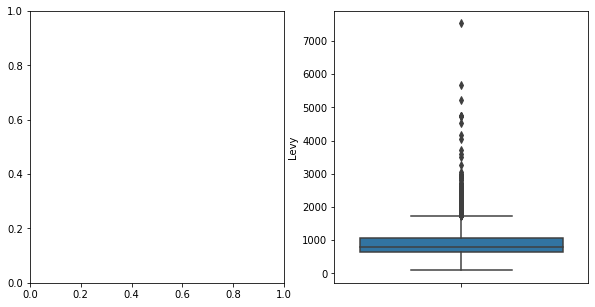

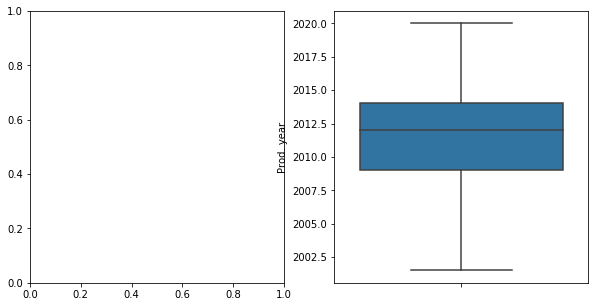

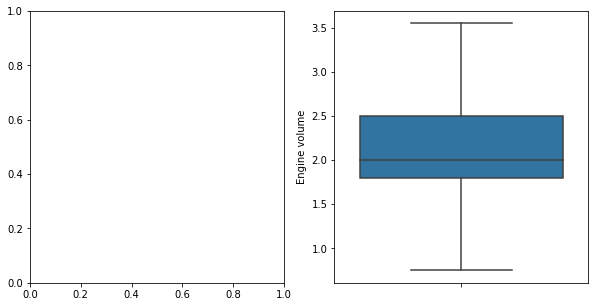

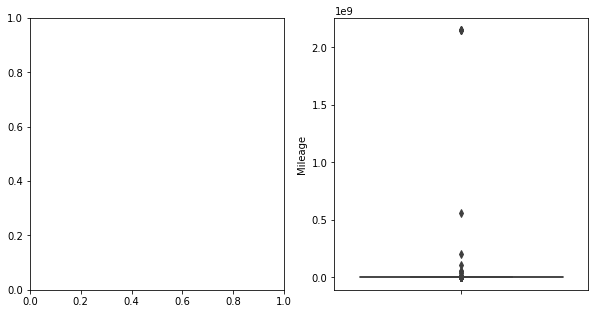

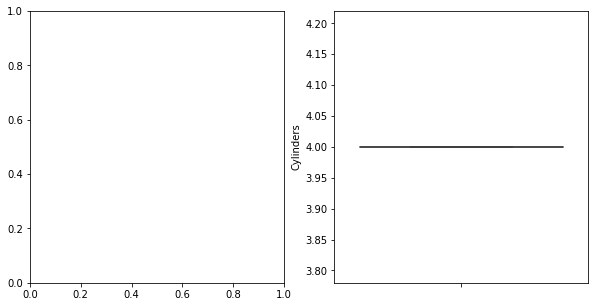

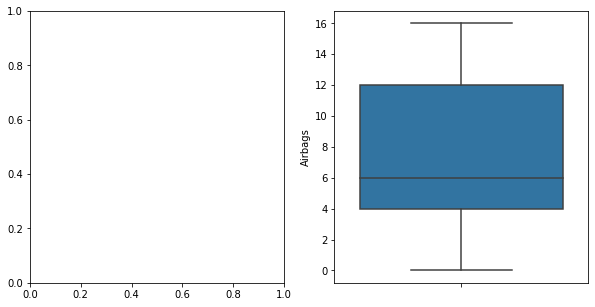

In [75]:
for i in col:
    fig_dims = (10, 5) 
    fig, axs = plt.subplots(nrows=1, ncols=2,figsize=fig_dims) 
    #sns.distplot(price[i], kde=True, ax=axs[0]) 
    sns.boxplot(x= i, data=t_test, ax=axs[1],orient="v") 

In [76]:
t_test.columns

Index(['Levy', 'Manufacturer', 'Prod. year', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type',
       'Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags', 'Price', 'kind'],
      dtype='object')

In [297]:
encoder=ce.HashingEncoder(cols='Manufacturer',n_components=10)

In [ ]:
t_test=encoder.fit_transform(t_test,inplace=True)

In [ ]:
t_test.rename(columns={'col_0':'Man0','col_1':'Man1','col_2':'Man2','col_3':'Man3','col_4':'Man4','col_5':'Man5','col_6':'Man6','col_7':'Man7','col_8':'Man8','col_9':'Man9'},inplace=True)

In [236]:
#encoder1=ce.HashingEncoder(cols='Model',n_components=12)

In [237]:
#t_test=encoder1.fit_transform(t_test,inplace=True)

In [238]:
#t_test.rename(columns={'col_0':'Mod0','col_1':'Mod1','col_2':'Mod2','col_3':'Mod3','col_4':'Mod4','col_5':'Mod5','col_6':'Mod6','col_7':'Mod7','col_8':'Mod8','col_9':'Mod9','col_10':'Mod10','col_11':'Mod11'},inplace=True)

In [195]:
t_test.drop('Price',axis=1,inplace=True)

In [196]:
test_dummy = pd.get_dummies(t_test,drop_first=True)
test_dummy.head()

,Man0,Man1,Man2,Man3,Man4,Man5,Man6,Man7,Man8,Man9,...,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,kind_Turbo
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
test_dummy.columns

Index(['Man0', 'Man1', 'Man2', 'Man3', 'Man4', 'Man5', 'Man6', 'Man7', 'Man8',
       'Man9', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders',
       'Airbags', 'Category_Coupe', 'Category_Goods wagon',
       'Category_Hatchback', 'Category_Jeep', 'Category_Limousine',
       'Category_Microbus', 'Category_Minivan', 'Category_Pickup',
       'Category_Sedan', 'Category_Universal', 'Leather interior_Yes',
       'Fuel type_Diesel', 'Fuel type_Hybrid', 'Fuel type_Hydrogen',
       'Fuel type_LPG', 'Fuel type_Petrol', 'Fuel type_Plug-in Hybrid',
       'Gear box type_Manual', 'Gear box type_Tiptronic',
       'Gear box type_Variator', 'Drive wheels_Front', 'Drive wheels_Rear',
       'Doors_B', 'Doors_C', 'Wheel_Right-hand drive', 'Color_Black',
       'Color_Blue', 'Color_Brown', 'Color_Carnelian red', 'Color_Golden',
       'Color_Green', 'Color_Grey', 'Color_Orange', 'Color_Pink',
       'Color_Purple', 'Color_Red', 'Color_Silver', 'Color_Sky blue',
       'Color_White',

In [320]:
test_dummy.shape

(8245, 57)

In [321]:
ss.mean_

array([2.01092345e+03, 2.30212894e+00, 1.59021974e+06, 4.57624943e+00,
       6.55646988e+00, 9.07744826e+02])

In [197]:
test_dummy.loc[:, ss_cols] = ss.transform(test_dummy.loc[:, ss_cols])

In [198]:
test_dummy.loc[:] = ki.transform(test_dummy.loc[:])

In [244]:
test_dummy.loc[:,'Mil/Lev']=test_dummy.loc[:,'Mileage']/test_dummy.loc[:,'Levy']

In [138]:
test_dummy[['Levy','Mileage','Mil/Lev']]

,Levy,Mileage,Mil/Lev
0,-0.439716,-0.026827,0.061010
1,-0.677559,-0.028848,0.042577
2,-0.003374,-0.025694,7.614499
3,0.157988,-0.026249,-0.166146
4,0.918822,-0.024983,-0.027190
...,...,...,...
8240,1.002377,-0.025782,-0.025721
8241,-0.235471,-0.025960,0.110248
8242,1.641195,-0.027140,-0.016537
8243,-0.264207,-0.029359,0.111123


In [177]:
y_predict_ann = best_model_ann.predict(test_dummy)

In [178]:
y_predict_ann=np.exp(y_predict_ann)
y_predict_ann

array([20328.65669629, 10126.34450449, 12307.08479389, ...,
        3665.22017166, 64213.09949499,  3016.42827201])

In [199]:
y_predict_xgb = xgb_tuned.predict(test_dummy)

In [200]:
y_predict_xgb=np.exp(y_predict_xgb)
y_predict_xgb

array([15856.432  ,   804.1336 ,  5739.3584 , ...,   540.05566,
       25710.738  ,   830.65155], dtype=float32)

In [538]:
y_predict_gbc = gbc_tuned.predict(test_dummy)

In [539]:
y_predict_gbc=np.exp(y_predict_gbc)
y_predict_gbc

array([21006.64751394, 13012.59591085,  5700.94965927, ...,
        3211.87603655, 19520.26676965,  1026.11250661])

In [201]:

Y=pd.DataFrame(y_predict_xgb,columns=['Price'])
Y


,Price
0,15856.431641
1,804.133606
2,5739.358398
3,2994.229492
4,2793.274658
...,...
8240,8716.177734
8241,32372.083984
8242,540.055664
8243,25710.738281


In [202]:
Y.to_csv('price.csv', index=False)